<a href="https://colab.research.google.com/github/anderl23/Diabetes-Prediction-using-Maching-Learning-methods---Random-Forrest-and-AutoML---Louise-Anderson/blob/main/ca4015_LouiseAnderson_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction using Maching Learning methods - Random Forest and AutoML - Louise Anderson

## Introduction and Context 
The dataset examined in this notebook originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The patients represented by this dataset are all females of Pima Indian heritage who are at least 21 years of age.
The dataset includes the following eight medical predictor variables:
  - Pregnancies (Number of times the patient has been pregnant)
  - Glucose (Patient's plasma glucose concentration at 2 hours in an oral glucose tolerance test)
  - BloodPressure (Patient's diastolic blood pressure (mm Hg))
  - SkinThickness (Patient's triceps skin fold thickness (mm))
  - Insulin (Patient's 2-Hour serum insulin level (mu U/ml))
  - BMI (Patient's body mass index (weight in kg/(height in m)^2))
  - DiabetesPedigreeFunction (Patient's likelihood of having diabetes based on family history)
  - Age (Age of patient in years)

The dataset also includes a class variable 'Outcome' of which Outcome=1 indicates that the patient has been diagnosed with diabetes and Outcome=0 indicates that the patient has not. 

In the original paper the ADAP learning algorithm is used to forecast the onset of diabetes [1].

Here two different machine learning modelling aproaches - Random Forest and AutoML - are executed in an attempt to accurately predict whether or not the patients in the dataset have diabetes or not. Both methods are then critically evaluated.

## Prerequisites, Imports and Load Data

In [ ]:
#pip install --pre pycaret # uncomment to install pycaret

In [ ]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [ ]:
# Load date from csv
df = pd.read_csv('diabetes.csv')

## Exploratory Data Analysis

In [ ]:
# Show first five rows of dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Show count of non null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All variables are of integer or float data types and are all non-null values. However null values may have been replaced with 0 and distributions should be examined to determine whether 0 values should be replaced with variables mean/median [2].

In [ ]:
# check the number of zero values
for col in df.columns:
    print(f'{col} has {(df[col]==0).sum()} zero values.')

Pregnancies has 111 zero values.
Glucose has 5 zero values.
BloodPressure has 35 zero values.
SkinThickness has 227 zero values.
Insulin has 374 zero values.
BMI has 11 zero values.
DiabetesPedigreeFunction has 0 zero values.
Age has 0 zero values.
Outcome has 500 zero values.


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

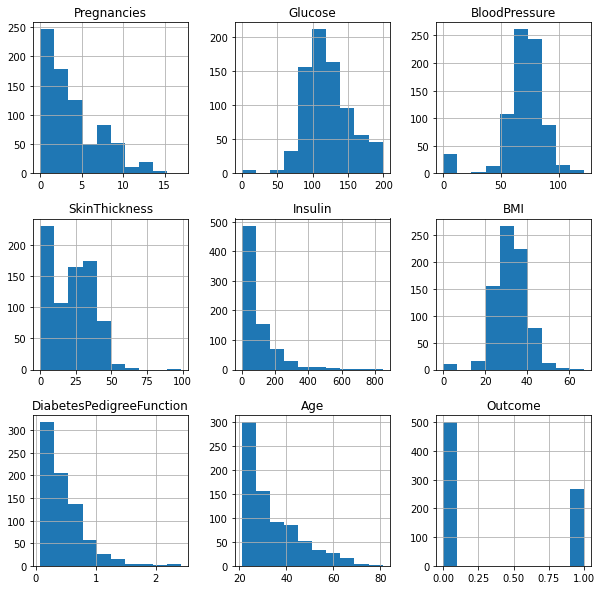

In [ ]:
# plot column distributions
df.hist(figsize=(10,10))

<AxesSubplot:>

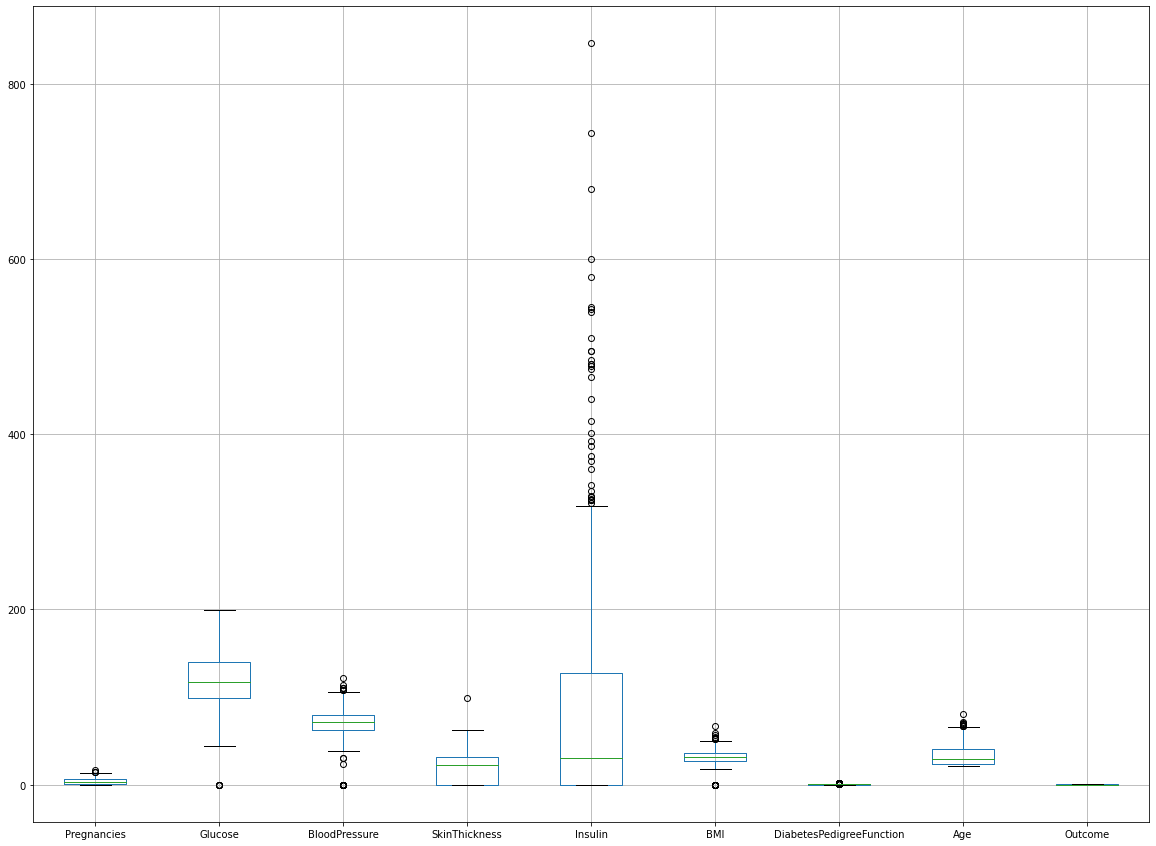

In [ ]:
#plot column variability
df.boxplot(figsize=(20,15))

Age and DiabetesPedigreeFunction have no zero values. Pregnancies has 111 zero values and Outcome has 500 however these are valid numerical values for these variables.
Glucose, BloodPressure, SkinThickness, Insulin and BMI however should not have zero values therefore these values will be replaced with each columns median. Median is chosen over mean as observations contain some outliers. 

### Data Preprocessing

In [ ]:
# replace '0' values with Nan so as not to calculate mean for relevant columns with 0 values.
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [ ]:
# fill the now null values with columns median
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

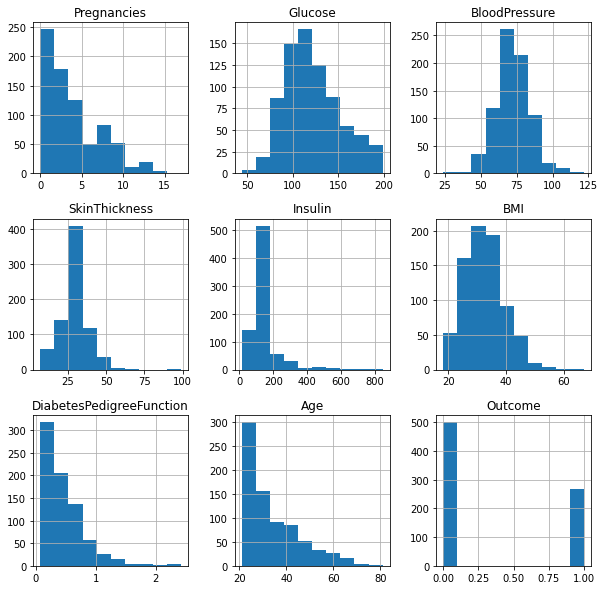

In [ ]:
#replot variable distributions
df.hist(figsize=(10,10))

Taget variable outcome is unbalanced therefore it will be better to use F1 than precision.

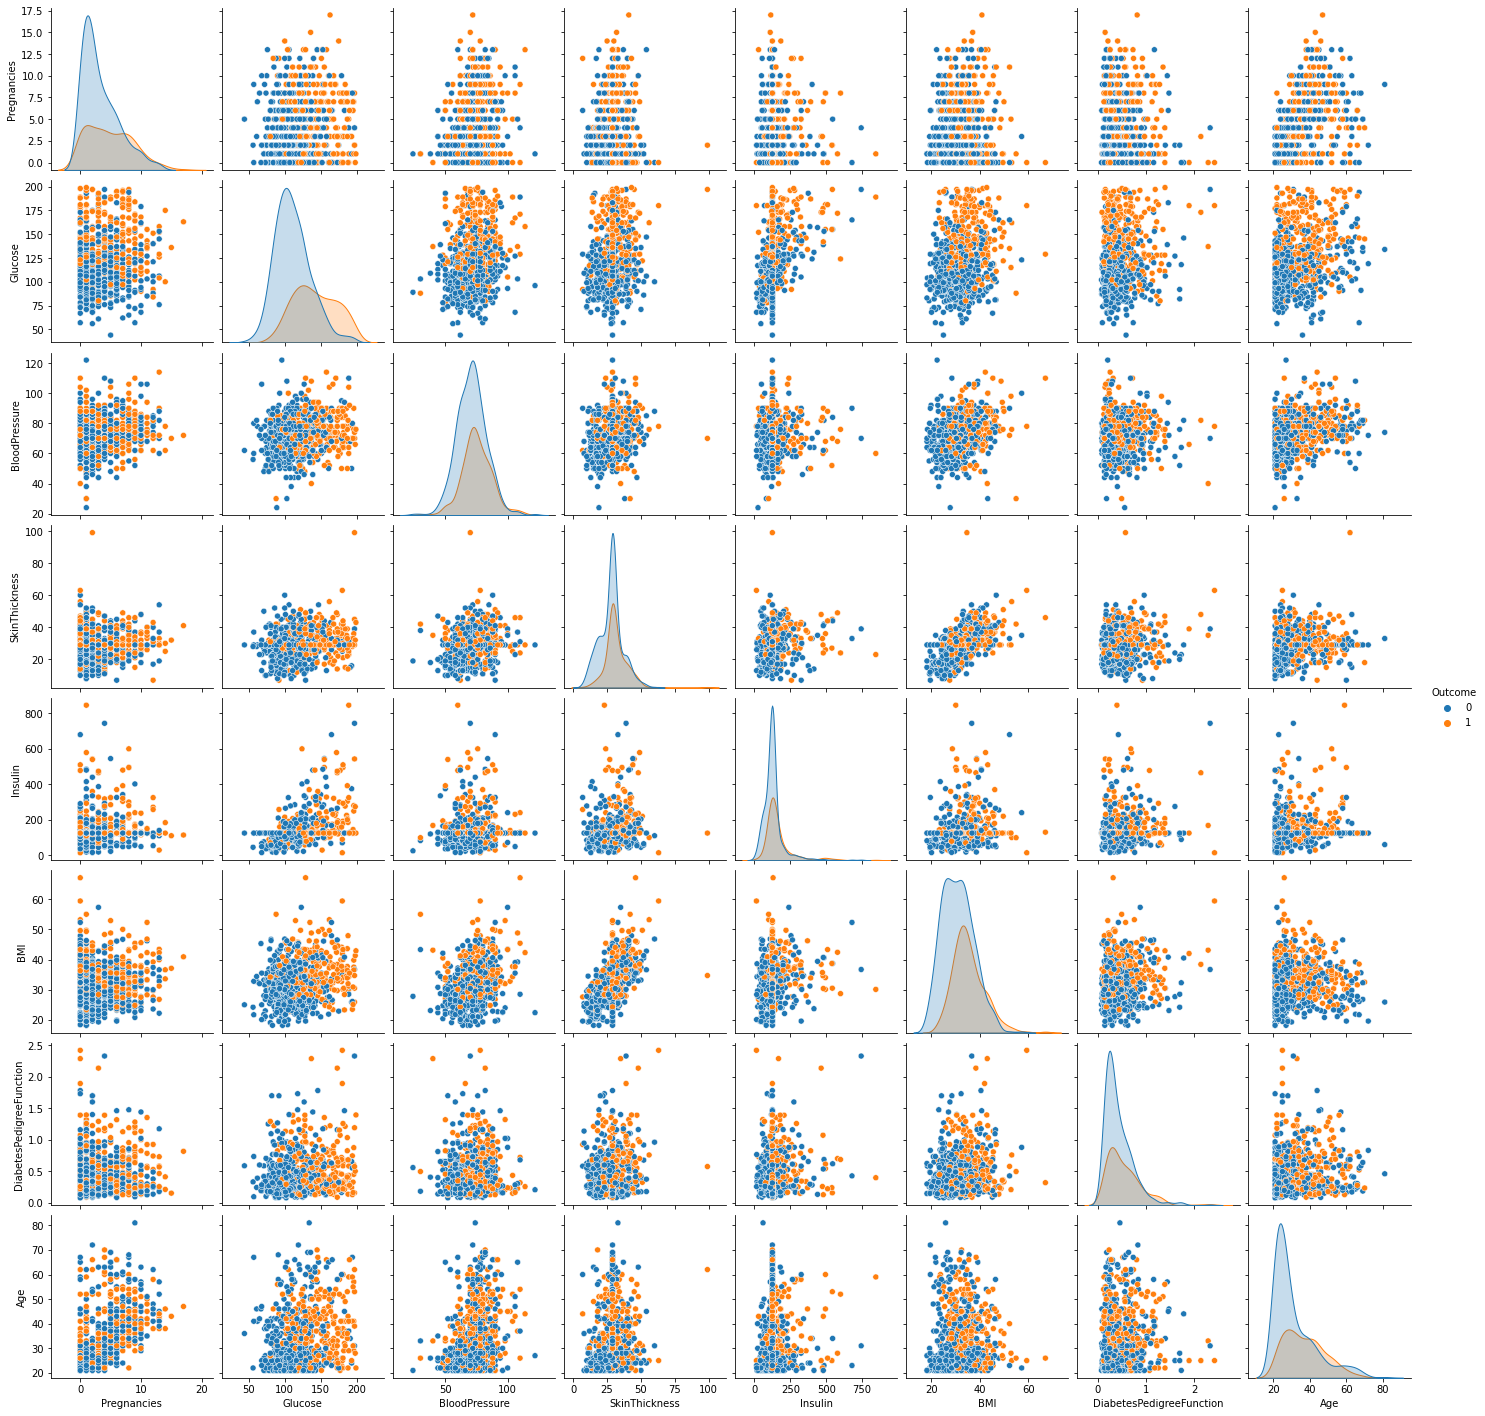

In [ ]:
sns.pairplot(df,hue = 'Outcome')

In [ ]:
# calculate correlation between variables
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


No high correlation is observed between variables therefore no variables removed/selected based on correlation.

## Modeling
### Approach 1 - Random Forest Classifier

In [ ]:
# Assign features and target features
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) # 80% training and 20% test


In [ ]:
# create classifier
clf=RandomForestClassifier(random_state=1)

# train model and execute prediction
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#### Results

In [ ]:
# Measure the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


<AxesSubplot:>

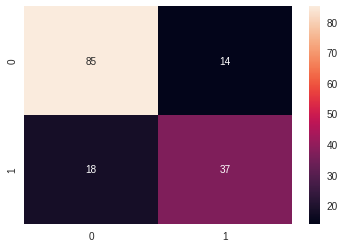

In [119]:
cm =metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        99
           1       0.73      0.67      0.70        55

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



While overall accuracy is equal to 0.79 our model has higher recall in correctly classifying patients who do not have diabetes (0.86) than correctly classifying patients who have diabetes (0.67). 14 patients who have diabetes have been incorrectly classified as not having diabetes while 18 patients who do not have diabetes have been incorrectly classified as having it.
In these circumstances the percentage of false negatives is more worrying than the percentage of false positives as it is imperitive that patients with diabetes are classified correctly so that they can be treated. 

## Approach 2 - AutoML using PyCaret
### What is AutoML?
In machine learning there are many different algorithms that may be utilised, with some more suited/more accurate than others, depending on the problem we are trying to solve. Knowing which algorithm to select based on the problem statement comes with experience or requires trial and error of various approaches.  
Once an algorithm is selected, we can attempt to improve our model by trying and testing various different model parameters in order to achieve optimum performance. Again, this will not be one size fits all. Hyperparameter tuning will differ based on what we are trying to achieve and can be a tedious manual task.
When it come to the evaluation our models, what method should be used to do so? Will an 80/20 train test split be sufficient or is k-fold cross validation required? An 80/20 train test split may produce a fluke result. However, k-fold cross validation can be computationally expensive and slow.

Automated machine learning (AutoML) assists Data Scientists in machine learning algorithm selection, hyperparameter tuning of models and model evaluation.
It does this by producing machine learning solutions so that we are no longer required to perform numerous, code-heavy inquiries on model selection, data preparation, hyperparameter tuning and evalution methods. 
AutoML frameworks can additionally improve their performance by utilizing their experience. 
While AutoML does not replace the human in the loop, particularly when it comes to domain knowledge, it allows data scientists to attempt things to improves results far more rapidly by utilizing optimization algorithms such as random search, grid search and Baysian to name a few.

### AutoML with PyCaret
PyCaret is an open-source library in Python that automates machine learning workflows. Its modules include:
- Supervised ML
  - Classification
  - Regression
- Unsupervised ML
  - Clustering
  - Anomaly Detection
  - NLP
  - Associated Rules Mining
- Time-series
  - For forcast prediction

Passing the dataset and target variable to the setup function initializes a number of preprocesses to the data in just one line of code including:
- Data preparation:
   - Handling of missing values
   - Data type detection
   - One-hot encoding (encoding categorical variables of equal importance)
   - Ordinal encoding (encoding ordinal categorical variables of ordinal importance)
   - Fixing target imbalance
   - Outlier removal
 
- Scaling and Transforming:
    - Normalization
    - Feature Transformation
    - Target Transformation

- Feature Engineering
- Feature Selection
  - Remove multicollinearity
  - PCA

Once these preprocesses have been executed we can train and compare 14 different classification models across 7 different metrics in order to determine which algorithm is most appropriate for the problem for which we are trying to solve. 

After selecting our preferred model we can optimize it by using tuning and ensembling methods such as bagging and boosting, optimize the probability with simple lines of code simply by passing the model to an optimization function.

Pycaret has several analysis functions such as plotting, evaluation, interpretation and EDA using Autoviz so that assist data scientists in providing explainabilty to the model.

It also has deployment functions so that models can be saved as pickle files, deployed in the cloud or be converted into different programming languages such as Java or C.







In [ ]:
# Reload data from csv
autoML_df = pd.read_csv('diabetes.csv')

In [ ]:
# replace '0' values with Nan for glucose, bloodpressure, skinthickness, insulin and BMI.
# Pycaret will not preprocess these values if they remain as zero.
autoML_df['Glucose'] = autoML_df['Glucose'].replace(0, np.nan)
autoML_df['BloodPressure'] = autoML_df['BloodPressure'].replace(0, np.nan)
autoML_df['SkinThickness'] = autoML_df['SkinThickness'].replace(0, np.nan)
autoML_df['Insulin'] = autoML_df['Insulin'].replace(0, np.nan)
autoML_df['BMI'] = autoML_df['BMI'].replace(0, np.nan)

In [120]:
clf1 = setup(data = autoML_df
             ,target = 'Outcome'
             #,remove_outliers=True #uncomment to remove outliers
             ,fix_imbalance=True #uncomment to fix imbalance in target variable
             #,train_size=0.8 #uncomment to update train size from 0.7 to 0.8
             ,numeric_imputation='median' #uncomment to replace nulls with median rather than default mean
             )

,Description,Value
0,Session id,254
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(931, 9)"
5,Transformed train set shape,"(700, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Rows with missing values,49.0%
9,Preprocess,True


I test several combinations of parameter changes within the setup function and found that numeric imputation with median and fix_imbalance=True to yield the highest F1 results when models were compared 

In [121]:
#compare 14 classification models sorting on F1 score
best = compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7729,0.8357,0.7173,0.6680,0.6881,0.5108,0.5154,0.5620
ridge,Ridge Classifier,0.7691,0.0000,0.7064,0.6715,0.6828,0.5030,0.5092,0.0270
lda,Linear Discriminant Analysis,0.7691,0.8346,0.7064,0.6715,0.6828,0.5030,0.5092,0.0320
rf,Random Forest Classifier,0.7673,0.8425,0.7067,0.6664,0.6794,0.4985,0.5057,0.2560
gbc,Gradient Boosting Classifier,0.7653,0.8431,0.7383,0.6532,0.6882,0.5027,0.5103,0.1200
ada,Ada Boost Classifier,0.7578,0.8179,0.7175,0.6515,0.6747,0.4853,0.4945,0.0950
et,Extra Trees Classifier,0.7486,0.8336,0.6901,0.6413,0.6595,0.4626,0.4679,0.2560
dt,Decision Tree Classifier,0.7449,0.7235,0.6526,0.6351,0.6400,0.4434,0.4470,0.0320
lightgbm,Light Gradient Boosting Machine,0.7374,0.8250,0.6690,0.6229,0.6397,0.4352,0.4409,0.1150
qda,Quadratic Discriminant Analysis,0.7354,0.7995,0.6526,0.6190,0.6306,0.4261,0.4309,0.0320


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [122]:
#Show parameters of best classifier
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=254, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [123]:
# create_model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6481,0.7218,0.4737,0.5000,0.4865,0.2192,0.2194
1,0.6852,0.7654,0.6316,0.5455,0.5854,0.3338,0.3361
2,0.7963,0.8256,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.8519,0.9353,0.7895,0.7895,0.7895,0.6752,0.6752
4,0.9074,0.9414,0.8421,0.8889,0.8649,0.7945,0.7952
5,0.7407,0.8150,0.7368,0.6087,0.6667,0.4577,0.4633
6,0.7593,0.8541,0.7368,0.6364,0.6829,0.4906,0.4940
7,0.8302,0.8794,0.7222,0.7647,0.7429,0.6163,0.6168
8,0.7547,0.7921,0.6667,0.6316,0.6486,0.4605,0.4609


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [124]:
# tune model
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6481,0.7233,0.4737,0.5000,0.4865,0.2192,0.2194
1,0.6852,0.7669,0.6316,0.5455,0.5854,0.3338,0.3361
2,0.7963,0.8241,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.8333,0.9308,0.7895,0.7500,0.7692,0.6389,0.6394
4,0.9074,0.9414,0.8421,0.8889,0.8649,0.7945,0.7952
5,0.7407,0.8150,0.7368,0.6087,0.6667,0.4577,0.4633
6,0.7593,0.8541,0.7368,0.6364,0.6829,0.4906,0.4940
7,0.8302,0.8810,0.7222,0.7647,0.7429,0.6163,0.6168
8,0.7547,0.7921,0.6667,0.6316,0.6486,0.4605,0.4609


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Mean accuracy of lr > mean accuracy tuned_lr therefore we will stick with the original model

In [125]:
#compare hyperparameters
print(lr)
print(tuned_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=254, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=254, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [127]:
boosted_lr = ensemble_model(lr, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7278,0.5263,0.5263,0.5263,0.2692,0.2692
1,0.6481,0.7444,0.6316,0.5000,0.5581,0.2723,0.2775
2,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
3,0.8333,0.9414,0.7895,0.7500,0.7692,0.6389,0.6394
4,0.8889,0.9323,0.7895,0.8824,0.8333,0.7504,0.7530
5,0.7593,0.8135,0.7368,0.6364,0.6829,0.4906,0.4940
6,0.7407,0.8571,0.7368,0.6087,0.6667,0.4577,0.4633
7,0.8113,0.8571,0.6667,0.7500,0.7059,0.5677,0.5698
8,0.7358,0.7857,0.6111,0.6111,0.6111,0.4111,0.4111


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

mean accuracy lr > mean accuracy boosted_lr therefore again we will stick with the original lr model.

### Results

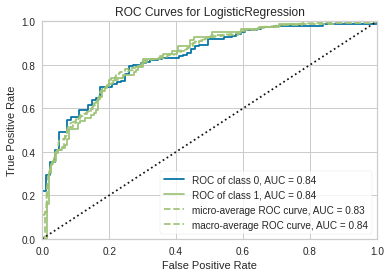

In [128]:
plot_model(lr)

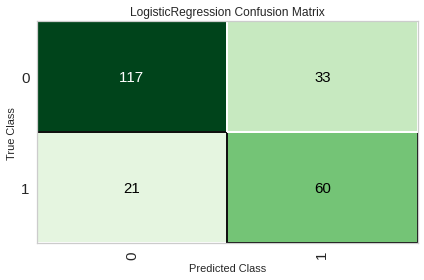

In [129]:
plot_model(lr, plot='confusion_matrix')

In [130]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Overall accuracy for the autoML logistic regression model = 0.7729. However recall is greater for those having diabetes (0.741) than it was for our random forrest model (0.67) which, as was previously stated, is of great importance as it is imperitave that patients having diabetes are classified correctly so that they made be treated.

## Critical evaluation and comparison of Random Forest vs AutoML
It is difficult to compare and contrast both approaches as they differ in their level of complexity. This is owing to the fact that it is far easier to test and implement more complex models using AutoML. 
The Random Forest model is extremely basic. Data preprocessing has been executed based on intuition and a limited amount of experience. 